In [ ]:
# !pip install tensorflow


In [1]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[2]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

src_path


WindowsPath('C:/Users/Nasiba/Documents/1 Master Data Science/Projektpraktikum/WebScience24')

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from collections import Counter
#nlp = spacy.load("en_core_web_sm")
from nltk import word_tokenize
pd.set_option('display.max_colwidth', None)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from vector_functions import vectorize_word2vec, vectorize_glove, vectorize_glove_without_avarage
import nltk

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.utils import to_categorical



In [3]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/train_cleaned.csv'))

df_cleaned = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)
df_cleaned.head(1)

,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
id,,,,,,
8886,0,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it,cinema award final rehearsal gear evening butterfly stage hope like,1,"['#cinemaaawards', '#butterflies', '#stage']",NaN


### Vektorisierung

##### 3. Word Embeddings Word2Vec

In [4]:

X_train_w2v, X_test_w2v, y_train_wv, y_test_vw, w2v_model = vectorize_word2vec(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")

print("Erste Trainingsvektoren:")
print(X_train_w2v[:5])

c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


Erste Trainingsvektoren:
[[ 0.00314334  0.24521321  0.01301071 ... -0.1790388   0.19609999
  -0.00181121]
 [-0.04438275  0.43822962 -0.02027336 ... -0.26726213  0.32337785
  -0.03934327]
 [-0.14954309  0.63838789 -0.15861544 ... -0.19953268  0.36492606
  -0.25506332]
 [ 0.02885317  0.3650401  -0.05225213 ... -0.16776089  0.26316421
  -0.10861357]
 [-0.00282995  0.46920646 -0.07680306 ... -0.21351249  0.3517583
  -0.14969297]]


#### GloVe 

In [6]:


twitter_glove_path = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/glove.twitter.27B.100d.txt'))


X_train_vectors, X_test_vectors, y_train, y_test, glove_embeddings = vectorize_glove(df=df_cleaned, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)


X_train_vectors



c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


array([[-0.583996  , -0.450814  , -0.1035202 , ...,  0.016966  ,
        -0.33943259,  0.053546  ],
       [-0.1287103 , -0.104341  ,  0.13883594, ...,  0.22292418,
         0.0079809 , -0.290725  ],
       [ 0.20086085,  0.02924227,  0.07529827, ..., -0.00104394,
        -0.23963281, -0.16206273],
       ...,
       [-0.11692216, -0.09952225,  0.05609166, ..., -0.02748892,
        -0.03281983, -0.13850327],
       [ 0.356345  , -0.09026249,  0.056145  , ...,  0.2262675 ,
         0.23486499, -0.43546249],
       [-0.20908655,  0.03102793,  0.10917436, ..., -0.13542962,
         0.04551986, -0.08509664]])

In [5]:


twitter_glove_path = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/glove.twitter.27B.100d.txt'))


X_train_vectors, X_test_vectors, y_train, y_test, glove_embeddings = vectorize_glove_without_avarage(df=df_cleaned, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)


X_train_vectors



c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


array([[[-0.28044   ,  0.39199999,  0.55759001, ...,  0.18381   ,
          0.094007  , -0.27184999],
        [-0.45910999, -0.58897001,  0.099599  , ...,  0.12999   ,
         -0.48536   , -0.31015   ],
        [-0.86185998, -0.94414997, -0.22002   , ..., -0.40002   ,
         -0.55721998,  0.74204999],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.039898  ,  0.90736002,  0.32747   , ...,  0.36886001,
          0.17496   , -0.58892   ],
        [ 0.45849001,  0.14165001,  0.0083564 , ...,  0.47777   ,
          0.21673   ,  0.16425   ],
        [-0.037545  ,  0.11898   ,  0.26445001, ...,  0.018283  ,
          0.004319  ,  0.11362   ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

### Reshaping für LSTM

In [7]:


X_train_vectors = X_train_vectors.reshape((X_train_vectors.shape[0], 1, X_train_vectors.shape[1]))
X_test_vectors = X_test_vectors.reshape((X_test_vectors.shape[0], 1, X_test_vectors.shape[1]))

print(X_train_vectors.shape)  # (1000, 1, 100)
print(X_test_vectors.shape)   # (300, 1, 100)


(14124, 1, 100)
(6054, 1, 100)


### one-hot-encoding (brauche ich nicht unbedingt)

In [8]:

num_classes = len(np.unique(y_train))
# One-hot-Encoding
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Prüfen der Form
print("y_train_onehot Shape:", y_train_onehot.shape)  # (n_samples, num_classes)


y_train_onehot Shape: (14124, 2)


### Modell aufbauen

In [ ]:
model = Sequential()

# Eingabe: LSTM-Schicht
model.add(LSTM(128, input_shape=(X_train_vectors.shape[1], X_train_vectors.shape[2]), return_sequences=False))

# Dropout zur Regularisierung
model.add(Dropout(0.5))

# Vollverbundene Schicht mit Softmax für Klassifikation
model.add(Dense(num_classes, activation='softmax'))

# Modell zusammenstellen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modellübersicht anzeigen
model.summary()

# Modell trainieren
history = model.fit(
    X_train_vectors, y_train,
    validation_data=(X_test_vectors, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,506 (459.01 KB)

 Trainable params: 117,506 (459.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9302 - loss: 0.2501 - val_accuracy: 0.9470 - val_loss: 0.1426
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9400 - loss: 0.1558 - val_accuracy: 0.9496 - val_loss: 0.1357
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9428 - loss: 0.1510 - val_accuracy: 0.9511 - val_loss: 0.1341
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9462 - loss: 0.1417 - val_accuracy: 0.9533 - val_loss: 0.1291
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9478 - loss: 0.1358 - val_accuracy: 0.9536 - val_loss: 0.1277
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9481 - loss: 0.1397 - val_accuracy: 0.9544 - val_loss: 0.1262
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9475 - loss: 0.1348 - val_accuracy: 0.9534 - val_loss: 0.1285
Epoch 8/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9502 - loss: 0.1357 - val_accuracy: 0.

### Modell bewerten

In [11]:

# Testgenauigkeit
test_loss, test_accuracy = model.evaluate(X_test_vectors, y_test_onehot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.1348
Test Loss: 0.1377, Test Accuracy: 0.9512


In [ ]:
print("Classification Report:\n", classification_report(y_test_vw, y_pred))

### Vorhersagen treffen

In [12]:
# Vorhersagen auf Testdaten
predictions = model.predict(X_test_vectors)
predicted_classes = np.argmax(predictions, axis=1)

# Beispiel: Erste 5 Vorhersagen anzeigen
print("Predicted classes:", predicted_classes[:50])
print("Actual classes:", np.argmax(y_test_onehot[:50], axis=1))




184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual classes: [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

### LSTM Modell aufbauen mit WordVec

In [13]:
X_train_w2v, X_test_w2v, y_train_wv, y_test_vw, w2v_model



X_train_vectors = X_train_w2v.reshape((X_train_w2v.shape[0], 1, X_train_w2v.shape[1]))
X_test_vectors = X_test_w2v.reshape((X_test_w2v.shape[0], 1, X_test_w2v.shape[1]))

print(X_train_vectors.shape)  # (1000, 1, 100)
print(X_test_vectors.shape)   # (300, 1, 100)


num_classes = len(np.unique(y_train_wv))
# One-hot-Encoding
y_train_onehot = to_categorical(y_train_wv, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_vw, num_classes=num_classes)

# Prüfen der Form
print("y_train_onehot Shape:", y_train_onehot.shape)  # (n_samples, num_classes)


model = Sequential()

# Eingabe: LSTM-Schicht
model.add(LSTM(128, input_shape=(X_train_vectors.shape[1], X_train_vectors.shape[2]), return_sequences=False))

# Dropout zur Regularisierung
model.add(Dropout(0.5))

# Vollverbundene Schicht mit Softmax für Klassifikation
model.add(Dense(num_classes, activation='softmax'))

# Modell zusammenstellen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modellübersicht anzeigen
model.summary()

# Modell trainieren
history = model.fit(
    X_train_vectors, y_train_onehot,
    validation_data=(X_test_vectors, y_test_onehot),
    epochs=10,
    batch_size=32,
    verbose=1
)



(13734, 1, 300)
(5886, 1, 300)
y_train_onehot Shape: (13734, 2)


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │       219,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,906 (859.01 KB)

 Trainable params: 219,906 (859.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
424/430 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9243 - loss: 0.2913

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 5886
'y' sizes: 5887


#### 4. FastText

In [ ]:

X_train_ft, X_test_ft, y_train, y_test, ft_model = vectorize_fasttext(
    df=df_cleaned,
    text_column="tweet_cleaned",
    label_column="label",
    vector_size=100,
    window=3,
    min_count=1
)

print("Erste FastText-Vektoren (Trainingsdaten):")
print(X_train_ft[:5])

Erste FastText-Vektoren (Trainingsdaten):
[[-0.29386375 -0.18855044 -0.28949956  0.1476144  -0.01624956  0.13286856
  -0.2226717   0.42894903  0.20227926 -0.34489603  0.14063459 -0.17879955
  -0.02656796  0.35571882  0.14739158 -0.18100273 -0.38855459 -0.38690186
   0.03949845 -0.1420191  -0.38428877  0.12217931 -0.43021867 -0.27014789
  -0.1585444  -0.19736542 -0.1047727  -0.11022075  0.39326515  0.0440884
   0.00890011 -0.11697213  0.26496852  0.09481627 -0.24331411  0.0848361
  -0.30035191  0.16245278 -0.38106031  0.10987324  0.03810994 -0.11336832
  -0.36291646 -0.35525489 -0.30596789 -0.63242    -0.13390998 -0.35441031
  -0.12001625  0.02514511  0.18910217  0.00634514  0.21914639 -0.05554438
  -0.13937775 -0.30562437 -0.07341961 -0.06837617 -0.10356644 -0.14365796
   0.35412748 -0.25115391 -0.28434361  0.4578321   0.03951711  0.10478977
  -0.09506598 -0.16083588 -0.14083032  0.36286939  0.15732638  0.3946838
  -0.32672708 -0.34217629  0.59179797 -0.22814074  0.11298252 -0.28843242

### Vergleiche 4 Methoden

Vektorisierung: Bag of Words
Vektorisierung: TF-IDF
Vektorisierung: Word2Vec


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Vektorisierung: FastText


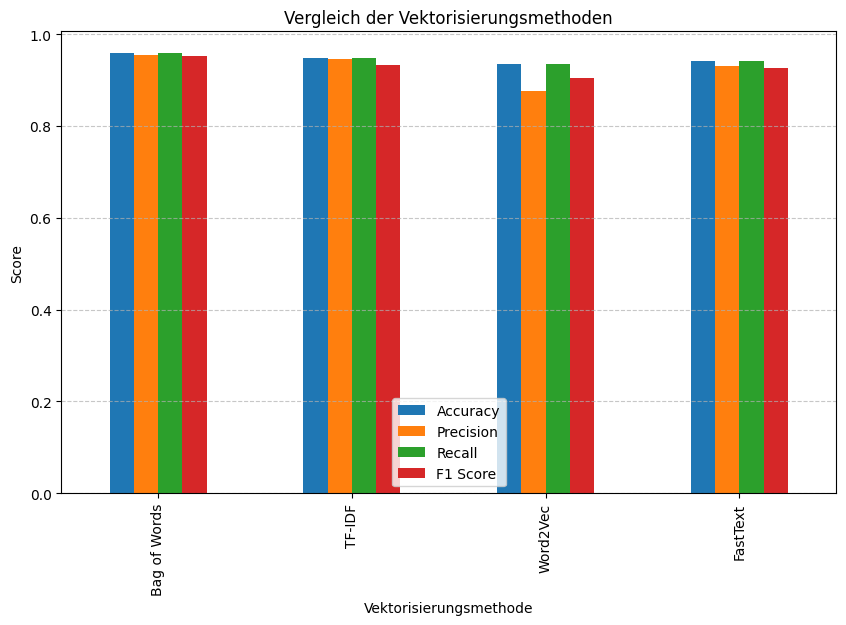

In [ ]:

results = compare_vectorization_methods(df=df_cleaned, text_column="tweet_cleaned", label_column="label")


results.plot(x="Method", y=["Accuracy", "Precision", "Recall", "F1 Score"], kind="bar", figsize=(6, 3))
plt.title("Vergleich der Vektorisierungsmethoden")
plt.ylabel("Score")
plt.xlabel("Vektorisierungsmethode")
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:

# Logistische Regression trainieren
model = LogisticRegression()
test_size=0.3
random_state=42
X = df_cleaned['tweet_cleaned']
y = df_cleaned['label']

X_train, X_test, y_train_wv, y_test_vw = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train_w2v, y_train_wv)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test_w2v)

# Performance evaluieren
print("Accuracy:", accuracy_score(y_test_vw, y_pred))
print("Classification Report:\n", classification_report(y_test_vw, y_pred))

# Entferne fehlende Werte
df_cleaned = df_cleaned[df_cleaned["tweet_cleaned"].notna()]

# Stelle sicher, dass alle Werte Strings sind
df_cleaned["tweet_cleaned"] = df_cleaned["tweet_cleaned"].astype(str)


In [ ]:

# Logistische Regression trainieren
model = LogisticRegression()
test_size=0.3
random_state=42
X = df_cleaned['tweet_cleaned']
y = df_cleaned['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train_vectors, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test_vectors)

# Performance evaluieren
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))